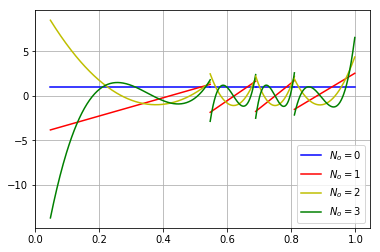

In [6]:
# creates and plot rescaled polynomial basis

# load pandas
import pandas as pd
# load numpy
import numpy as np
#import math
import matplotlib.pyplot as plt
import polytools as pt
#import wavetools as wt

# data location
url='../data/InputParameters.txt'

# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')

src=0
Nr=2
No=4
epts=1000
nNri=2**Nr
data=dataframe[src]
cl=['b-','r-','y-','g-','c-']
for Nri in range(nNri):
    lb,rb=pt.cmpLRB(Nr,Nri)
    qlb=data.quantile(lb)
    qrb=data.quantile(rb)
    #print(lb,rb,qlb,qrb)
    bd=pt.cmpQuantDomain(data,qlb,qrb)
    qdata=data[bd]
    #print(qdata.describe())
    cf=np.zeros([No+1,No+1])
    scf=np.zeros([No+1,No+1])
    gcf=np.zeros([No+1,No+1])
    ncf=np.zeros([No+1,No+1])
    H=pt.Hankel(No,qdata)
    r,w=pt.cmpGrw(H)
    #print('H=',H)
    for k in range(No):
        scf[k,:]=pt.aPCcfs(H,k) # Sergey style
        #print('H=',H)
        gcf[k,:]=pt.PCcfs(H,k) # Gautschi style
        cf[k,:]=gcf[k,:]
        nc=pt.cmpNormCf(cf[k,:],r,w)
        ncf[k,:]=cf[k,:]/nc
        pcf=ncf[k,:]
        p=np.poly1d(np.flip(pcf,0))
        x=np.linspace(qlb,qrb,epts//nNri)
        y=p(x)
        #print('p.c.',p.c)
        if Nri==0:
            plt.plot(x,y,cl[k],label='$N_o=$'+str(k))
        else:
            plt.plot(x,y,cl[k])

    #print('(',src,',',Nri,'):\n',cf,'\n',ncf,'\n')
plt.grid(True)
plt.legend(loc='best')
plt.show()
